<a href="https://www.kaggle.com/code/mohammedaliamzyl/palmer-archipelago-eda-predictive-modeling?scriptVersionId=135908950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


let us now play with this data and see what we can get out of it

In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# it's better to remove to null value in sex right now since it's the target column
df.dropna(subset=['sex'], inplace=True)

In [7]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

let's delete the row where the sex = ".", since it would not make a diffrence

In [9]:
df = df[df.sex != "."]

Let's see the distribution of the numerical values

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='body_mass_g', ylabel='Count'>

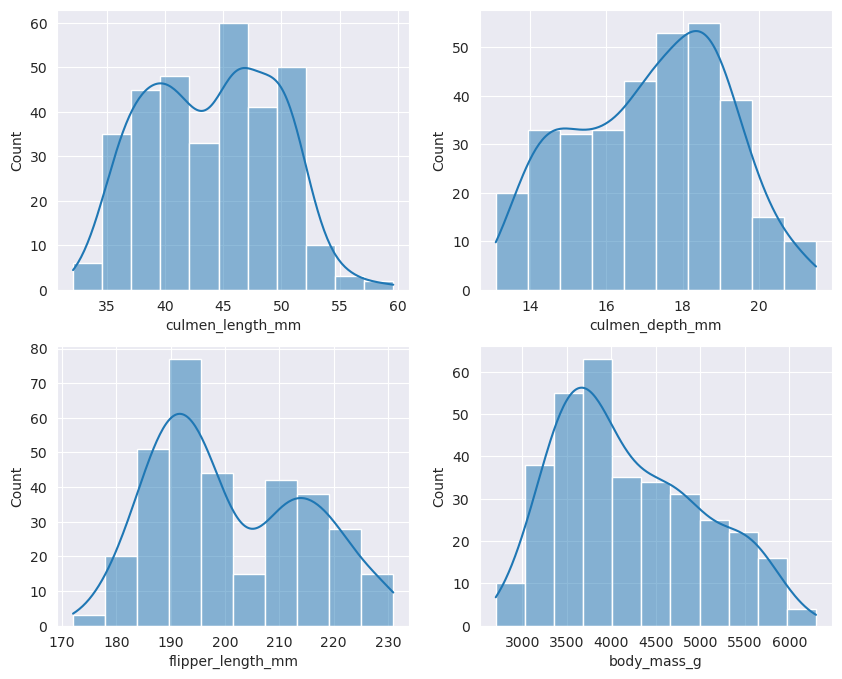

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.histplot(data = df, x='culmen_length_mm', kde=True, ax=ax[0][0])
sns.histplot(data = df, x='culmen_depth_mm', kde=True, ax=ax[0][1])
sns.histplot(data = df, x='flipper_length_mm', kde=True, ax=ax[1][0])
sns.histplot(data = df, x='body_mass_g', kde=True, ax=ax[1][1])

## Species

In [12]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

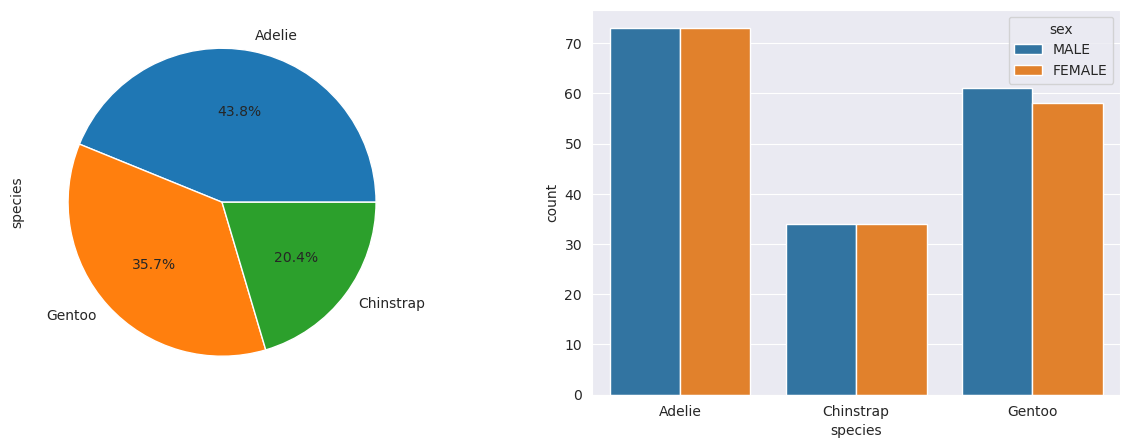

In [13]:
_, ax = plt.subplots(1,2, figsize=(15,5)) 
df.species.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
sns.countplot(data=df, x='species', hue='sex', ax=ax[1])

It seems like Adelie takes **44.2%** of the total propotion follow by Gentoo with **36%** they both have the same propotion in sex at last we have Gentoo with 19.8% and a little diffrence in the sex

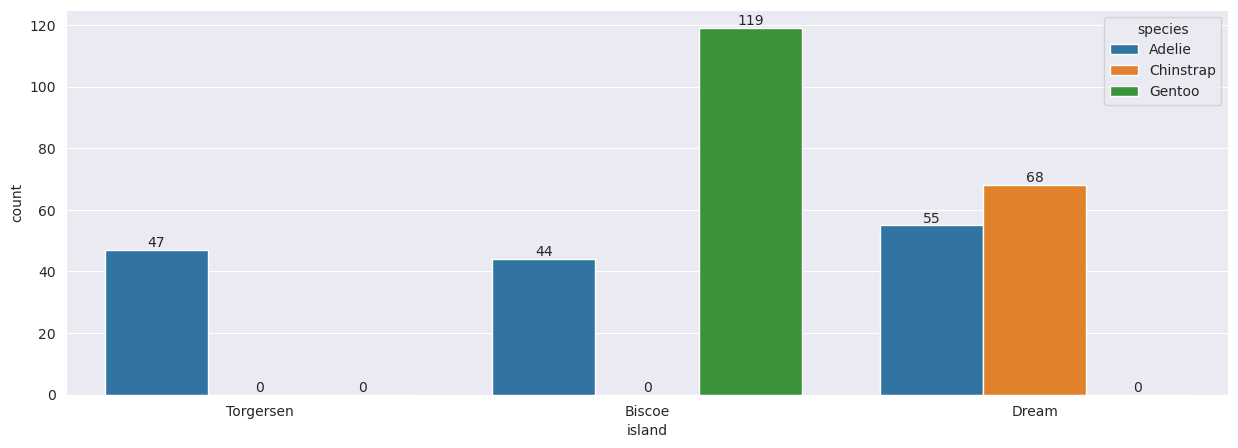

In [14]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='island', hue='species')
# show count
for container in ax.containers:
    ax.bar_label(container)

Interesting, the adelie lives in all of the three islands with smaller count in Biscoe island(44), whereas Chinstrap lives only Dream island the same thing for Gentoo, it lives only in Biscoe island with highest count 124

<Axes: xlabel='species', ylabel='body_mass_g'>

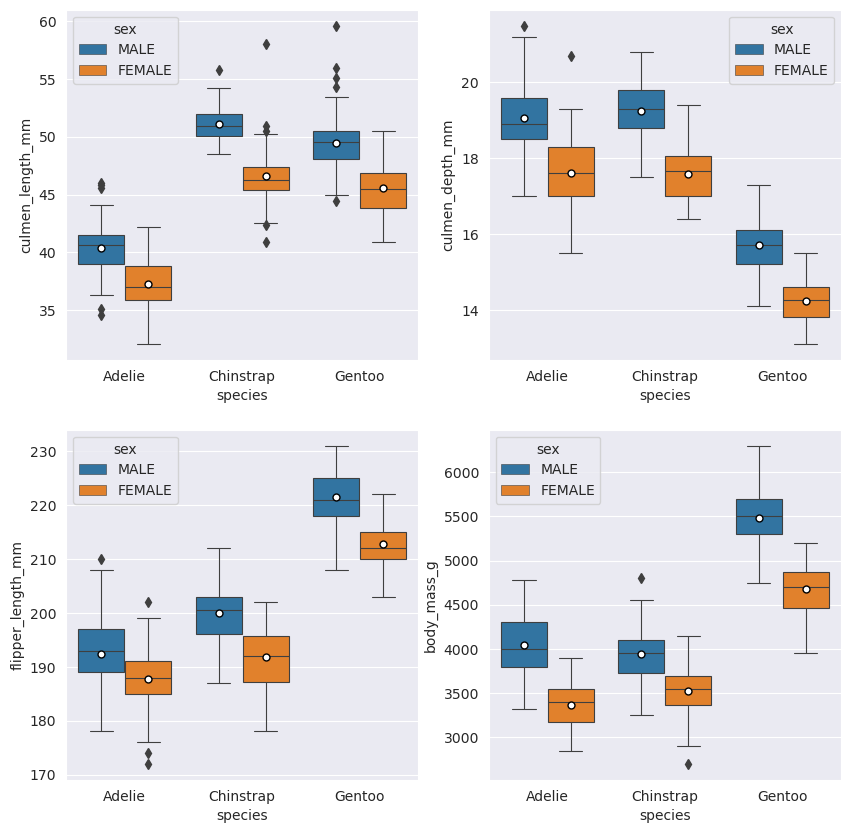

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(data=df, x='species', y='culmen_length_mm', hue='sex', ax=ax[0][0], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='species', y='culmen_depth_mm', hue='sex', ax=ax[0][1], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='species', y='flipper_length_mm', hue='sex', ax=ax[1][0], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex', ax=ax[1][1], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})

### **Observations:**
* for all of the four numerical features always the male has overall higher values than the female with one exception for a Chinstrap female that has higher culmen length over all the males

####  **culmen length:**
    1. Adelie penguins have lower culmen length that Chinstrap and Gento
    2. The penguin with the higher culmen length is a male Gentoo (59.6 mm)
    3. the lowest culmen length penguin is a female adelie (32.1 mm) 
    4. female Gentoo and female Chinstrap have closer culment length

#### **culmen depth:**
    1. Gentoo penguins have lower culmen depth that Chinstrap and Adelie
    2. The penguin with the higher culmen depth is a male adelie (21.5 mm)
    3. the lowest culmen depth penguin is a female Gentoo (13.1 mm)
    
#### **flipper length:**
    1. Adelie penguins have lowest flipper length that Chinstrap and Gentoo
    2. Gentoo penguins have overall the higher flipper length
    2. The penguin with the higher flipper length is a male adelie (231.0 mm)
    3. the lowest flipper length penguin is a female Gentoo (172.0 mm)
    
#### **body mass:**
    1. Adelie and Chinstrap penguins have similar range of body mass
    2. the penguin with the higher body mass is a male Gento with 6300.0 g
    2. the penguin with the lowest body mass is female Chinstrap with 2700.0 g

## Island

<Axes: ylabel='island'>

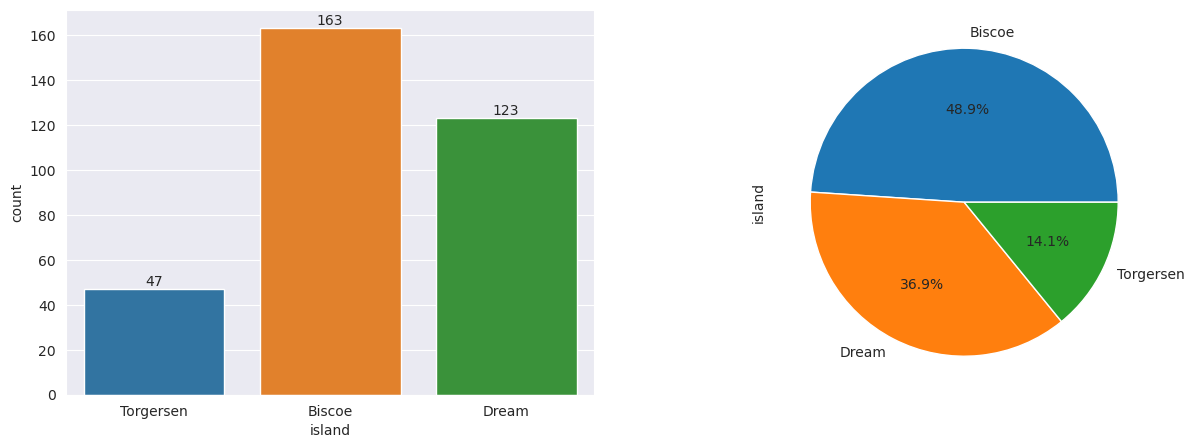

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_ = sns.countplot(data=df, x='island', ax=ax[0])
plot_.bar_label(plot_.containers[0])
df.island.value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')

We can observe that most of the penguins are located in Biscoe island *(48.9%)* followed by Dream *(36.9%)* and then torgersen *(14.1%)*

<Axes: xlabel='island', ylabel='body_mass_g'>

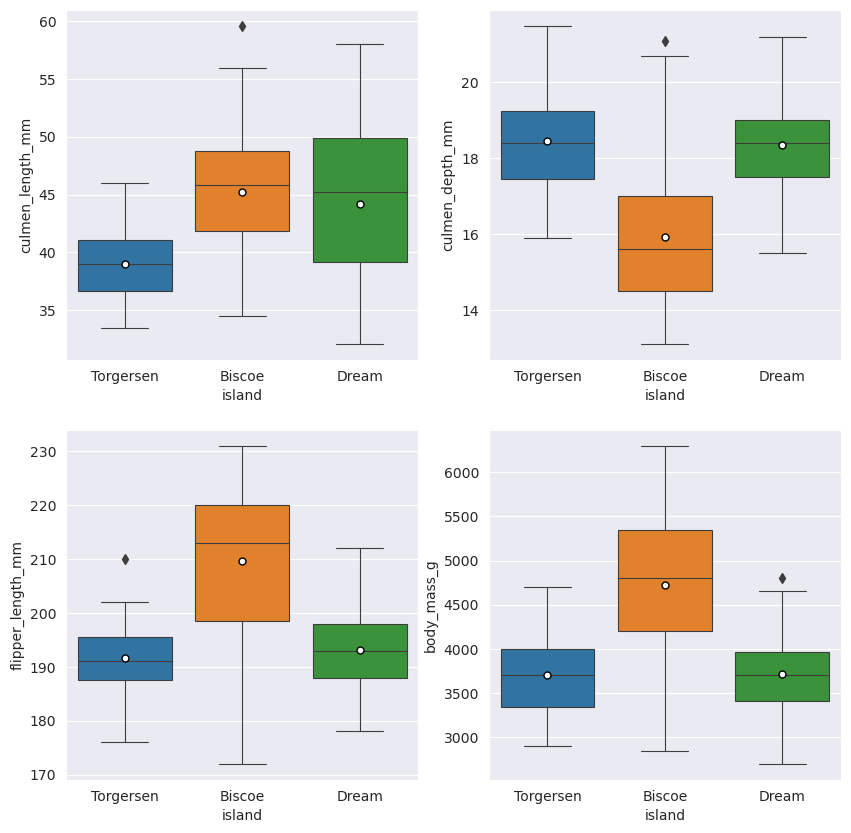

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(data=df, x='island', y='culmen_length_mm', ax=ax[0][0], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='island', y='culmen_depth_mm', ax=ax[0][1], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='island', y='flipper_length_mm', ax=ax[1][0], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})
sns.boxplot(data=df, x='island', y='body_mass_g', ax=ax[1][1], linewidth=.8,showmeans=True, meanprops={"marker":"o",
                                                                                                "markerfacecolor":"white",
                                                                                                "markeredgecolor":"black",
                                                                                                "markersize":"5"})

### **Observations:**
    1. Biscoe island has almost the highest clumen length & flipper length & body mass among all the other islands with the lowest clumen depth
    2. Torgersen and Dreams islans seems to have approximately the same body mass, flipper length and culmen depth
    

In [18]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


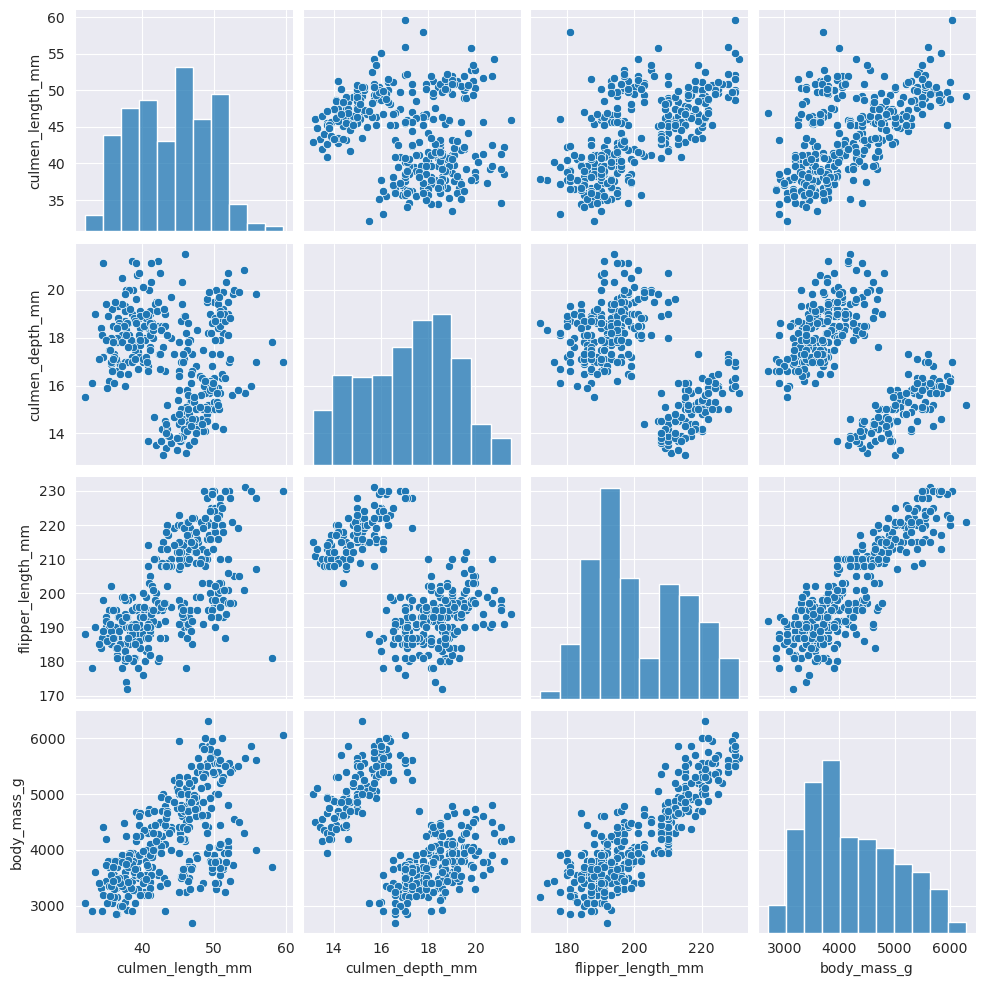

In [19]:
sns.pairplot(df )

we can observe that there is a positive relation between flipper length and the body mass, let's check the correlation

<Axes: >

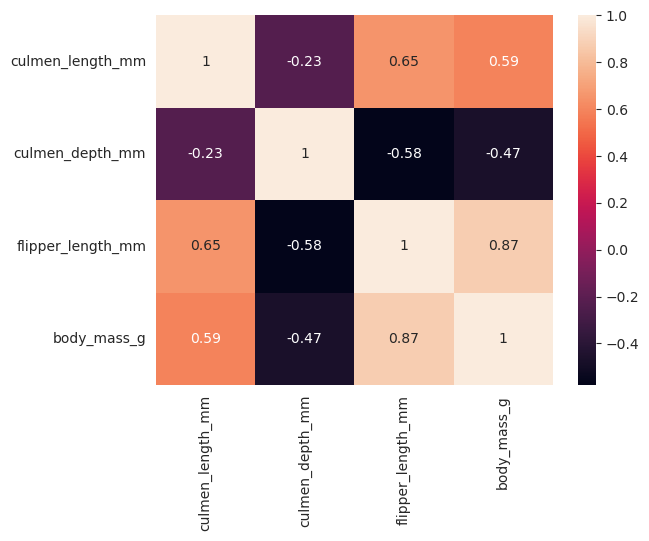

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

that proves what we said before the correlation between flipper length and the body mass is 0.87 

### preprocessing

In [21]:
df.sex = df.sex.apply(lambda x: 1 if x=='MALE' else 0)
df.sex.value_counts()

1    168
0    165
Name: sex, dtype: int64

In [22]:
df.body_mass_g = df.body_mass_g.apply(lambda x: x/1000)
df.rename(columns = {'body_mass_g':'body_mass_kg'}, inplace = True)
df.body_mass_kg.describe()

count    333.000000
mean       4.207057
std        0.805216
min        2.700000
25%        3.550000
50%        4.050000
75%        4.775000
max        6.300000
Name: body_mass_kg, dtype: float64

In [23]:
df = pd.get_dummies(df, prefix='island', columns=['island'])

In [24]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3.75,1,0,0,1
1,Adelie,39.5,17.4,186.0,3.80,0,0,0,1
2,Adelie,40.3,18.0,195.0,3.25,0,0,0,1
4,Adelie,36.7,19.3,193.0,3.45,0,0,0,1
5,Adelie,39.3,20.6,190.0,3.65,1,0,0,1


In [25]:
X = df.drop("species", axis=1)
Y = df['species']

## Predictive Modeling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [27]:
models = {
    'model': [],
    'accuracy': []
}

### Decision Tree

In [28]:
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=4)
tree_cv.fit(X_train, y_train)
print(tree_cv.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)


In [29]:
models['model'].append('Decision Tree')
models['accuracy'].append(tree_cv.best_score_)

### Random Forest

In [30]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5]
}
random_forest = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest, parameters, cv=4)
random_forest_cv.fit(X_train, y_train)
print(random_forest_cv.best_estimator_)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)


In [31]:
models['model'].append('Random Forest')
models['accuracy'].append(random_forest_cv.best_score_)

### XGboost

In [32]:
lr = LabelEncoder()
Y = lr.fit_transform(Y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [34]:
parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
xgb = XGBClassifier(objective='multi:softmax')
xgb_cv = GridSearchCV(xgb, parameters, cv=4)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)


In [35]:
models['model'].append('XGboost')
models['accuracy'].append(xgb_cv.best_score_)

### SVM

In [36]:
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters)
svm_cv.fit(X_train, y_train)
svm_cv.best_estimator_

SVC(C=0.1, gamma='auto', kernel='poly')

In [37]:
models['model'].append('SVM')
models['accuracy'].append(svm_cv.best_score_)

### Logistic Regression

In [38]:
parameters = {'C': [0.1, 1, 10]}
lr = LogisticRegression(solver='liblinear')
lr_cv = GridSearchCV(lr, parameters)
lr_cv.fit(X_train, y_train)
lr_cv.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [39]:
models['model'].append('Logistic Regression')
models['accuracy'].append(lr_cv.best_score_)

In [40]:
models = pd.DataFrame(models)

<Axes: xlabel='accuracy', ylabel='model'>

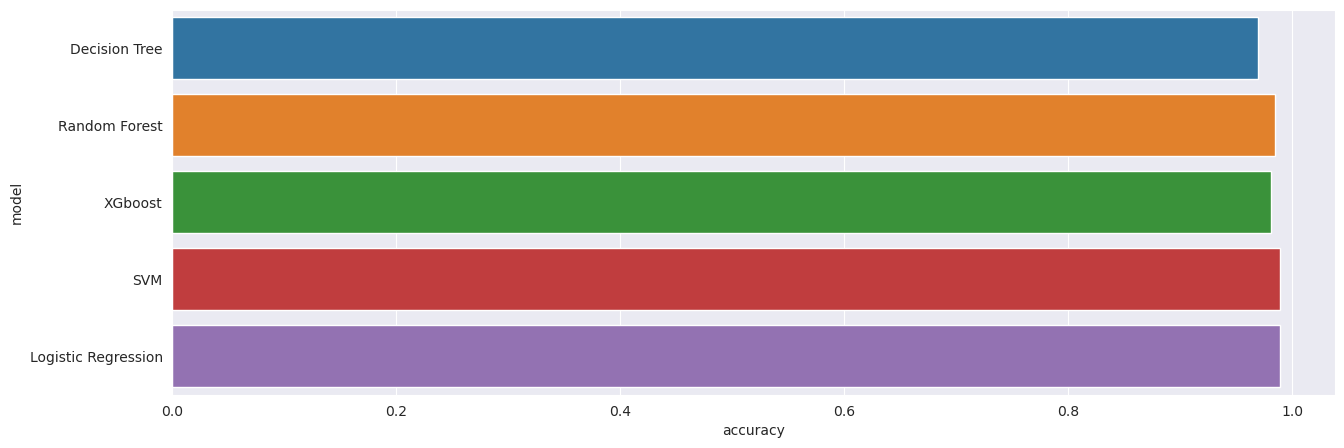

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data=models, x='accuracy', y= 'model')

In [42]:
lr_cv.best_params_

{'C': 0.1}

In [43]:
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [44]:
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9850746268656716

<Axes: >

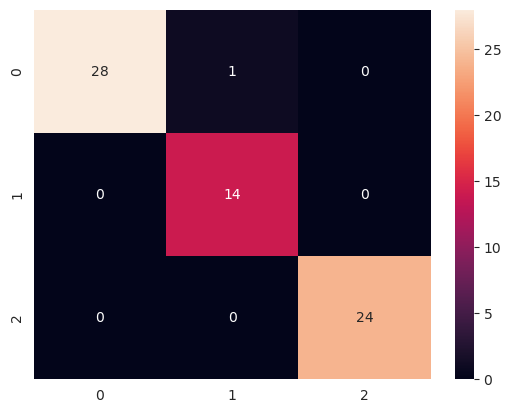

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)